In [13]:
#라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (코랩)
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
%matplotlib inline

In [14]:
def load_time_series_data(data, sequence_length):
    window_length = sequence_length + 1
    x_data = []
    y_data = []
    for i in range(0, len(data) - window_length + 1): 
        window = data[i:i + window_length, :]
        x_data.append(window[:-1, :])
        y_data.append(window[-1, [-1]])
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data

In [15]:
# 데이터 로드
df = pd.read_excel('./미세먼지데이터.xlsx')

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79773 entries, 0 to 79772
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          79773 non-null  int64  
 1   측정소명          79773 non-null  object 
 2   이산화질소농도(ppm)  78572 non-null  float64
 3   오존농도(ppm)     78670 non-null  float64
 4   일산화탄소농도(ppm)  78503 non-null  float64
 5   아황산가스(ppm)    78586 non-null  float64
 6   미세먼지(㎍/㎥)     78122 non-null  float64
 7   초미세먼지(㎍/㎥)    77596 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.9+ MB
None


In [18]:
df.isnull().sum()

측정일시               0
측정소명               0
이산화질소농도(ppm)    1201
오존농도(ppm)       1103
일산화탄소농도(ppm)    1270
아황산가스(ppm)      1187
미세먼지(㎍/㎥)       1651
초미세먼지(㎍/㎥)      2177
dtype: int64

In [19]:
df['이산화질소농도(ppm)'] = df['이산화질소농도(ppm)'].fillna(df['이산화질소농도(ppm)'].mean()).astype(float)
df['오존농도(ppm)'] = df['오존농도(ppm)'].fillna(df['오존농도(ppm)'].mean()).astype(float)
df['일산화탄소농도(ppm)'] = df['일산화탄소농도(ppm)'].fillna(df['일산화탄소농도(ppm)'].mean()).astype(float)
df['아황산가스(ppm)'] = df['아황산가스(ppm)'].fillna(df['아황산가스(ppm)'].mean()).astype(float)
df['미세먼지(㎍/㎥)'] = df['미세먼지(㎍/㎥)'].fillna(df['미세먼지(㎍/㎥)'].mean()).astype(float)
df['초미세먼지(㎍/㎥)'] = df['초미세먼지(㎍/㎥)'].fillna(df['초미세먼지(㎍/㎥)'].mean()).astype(float)

In [20]:
df.isnull().sum()

측정일시            0
측정소명            0
이산화질소농도(ppm)    0
오존농도(ppm)       0
일산화탄소농도(ppm)    0
아황산가스(ppm)      0
미세먼지(㎍/㎥)       0
초미세먼지(㎍/㎥)      0
dtype: int64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79773 entries, 0 to 79772
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          79773 non-null  int64  
 1   측정소명          79773 non-null  object 
 2   이산화질소농도(ppm)  79773 non-null  float64
 3   오존농도(ppm)     79773 non-null  float64
 4   일산화탄소농도(ppm)  79773 non-null  float64
 5   아황산가스(ppm)    79773 non-null  float64
 6   미세먼지(㎍/㎥)     79773 non-null  float64
 7   초미세먼지(㎍/㎥)    79773 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.9+ MB
None


In [8]:
print(df.describe())

               측정일시  이산화질소농도(ppm)     오존농도(ppm)  일산화탄소농도(ppm)    아황산가스(ppm)  \
count  7.977300e+04  79773.000000  79773.000000  79773.000000  79773.000000   
mean   2.019230e+07      0.029628      0.023571      0.532564      0.003872   
std    1.402234e+04      0.027295      0.013025      0.224586      0.001517   
min    2.017010e+07      0.000000      0.000000      0.100000      0.001000   
25%    2.018072e+07      0.018000      0.014000      0.400000      0.003000   
50%    2.019101e+07      0.028000      0.022000      0.500000      0.004000   
75%    2.020112e+07      0.039000      0.032000      0.600000      0.005000   
max    2.022011e+07      6.523000      0.247000      8.000000      0.148000   

          미세먼지(㎍/㎥)    초미세먼지(㎍/㎥)  
count  79773.000000  79773.000000  
mean      40.806341     22.522759  
std       27.353958     15.292534  
min        3.000000      1.000000  
25%       24.000000     12.000000  
50%       36.000000     19.000000  
75%       51.000000     28.000000  


In [9]:
# 마포구 필터링

df = df[df['측정소명'] == '마포구']
df = df.sort_values(by='측정일시')

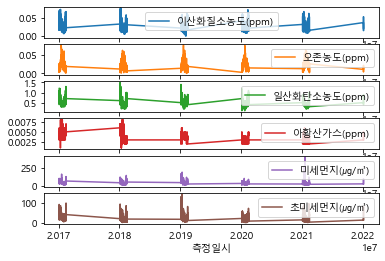

In [10]:
features_considered = ['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']
features = df[features_considered]
features.index = df['측정일시']
features.plot(subplots=True)
plt.show()

# 미세먼지 예측

In [11]:
# 미세먼지 데이터 넘파이로 변경
data = df[['미세먼지(㎍/㎥)']].to_numpy()
print(data.shape)

(1768, 1)


In [12]:
# 데이터 전처리

transformer = MinMaxScaler()
data = transformer.fit_transform(data)

sequence_length = 3
x_data, y_data = load_time_series_data(data, sequence_length)
x_data = x_data.reshape(len(x_data), -1)
print(x_data.shape) 
print(y_data.shape)

(1765, 3)
(1765, 1)


In [13]:
# 학습 데이터, 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용
print(x_train.shape)
print(y_train.shape) 
print(x_test.shape)
print(y_test.shape) 

(1235, 3)
(1235, 1)
(530, 3)
(530, 1)


In [14]:
# 모델 생성
input = tf.keras.layers.Input(shape=(3,1))
net = tf.keras.layers.LSTM(units=128, activation='relu')(input)
net = tf.keras.layers.Dense(units=128, activation='relu')(net)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)

In [ ]:
# 모델 생성
input = tf.keras.layers.Input(shape=(sequence_length,))
net = tf.keras.layers.LSTM(units=128, activation='relu')(input)
net = tf.keras.layers.Dense(units=128, activation='relu')(net)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)

In [15]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

In [16]:
# 모델 학습
print("\n============ TRAINING START ============")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stop]) 


============ TRAINING START ============
Epoch 1/50
39/39 [==============================] - 2s 10ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 7/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 8/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 9/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 10/50
39/39 [==============================] - 0s 3ms/step - loss: 0.

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 87,233
Trainable params: 87,233
Non-trainable params: 0
_________________________________________________________________


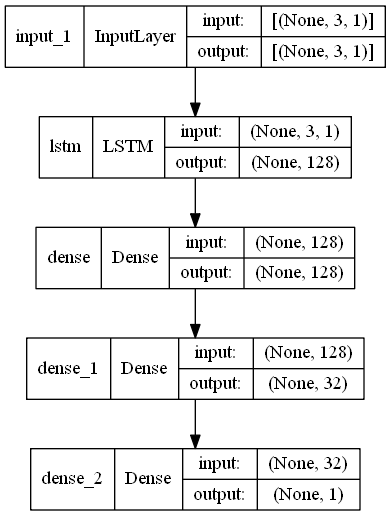

In [18]:
plot_model(model, show_shapes=True)

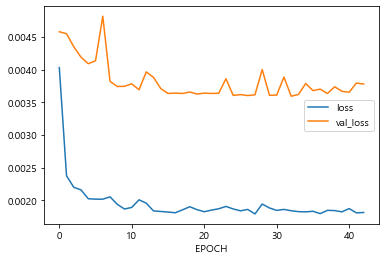

<Figure size 432x288 with 0 Axes>

In [19]:
# 학습결과 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel("EPOCH")
plt.legend(loc='center right')
plt.show()
plt.savefig("train_history.png")

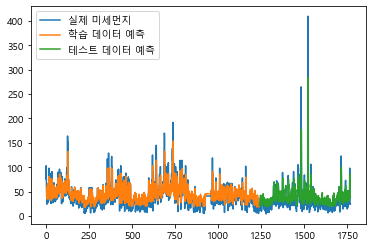

32.073906


In [20]:
# 미세먼지 예측                           

def plot(data, y_predict_train, y_predict_test):
    plt.plot(transformer.inverse_transform(data)[:, [-1]].flatten(), label='실제 미세먼지')

    y_predict_train = transformer.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[sequence_length:len(y_predict_train) + sequence_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='학습 데이터 예측')

    y_predict_test = transformer.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + sequence_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='테스트 데이터 예측')
    
    plt.legend()
    plt.show()
    
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

x_test = np.array([
        [25, 24, 24]   #1 월 11, 12, 13일 미세먼지 농도
])
x_test = x_test.reshape(-1, 1)
x_test = transformer.transform(x_test)
x_test = x_test.reshape(1, sequence_length)

y_predict = model.predict(x_test)

y_predict = transformer.inverse_transform(y_predict)
print(y_predict[0][0])   # 1월 14일 미세먼지 농도 예측값

# 초미세먼지 예측

In [21]:
# 미세먼지 데이터 넘파이로 변경
data = df[['초미세먼지(㎍/㎥)']].to_numpy()
print(data.shape)

(1768, 1)


In [22]:
# 데이터 전처리

transformer = MinMaxScaler()
data = transformer.fit_transform(data)

sequence_length = 3
x_data, y_data = load_time_series_data(data, sequence_length)
x_data = x_data.reshape(len(x_data), -1)
print(x_data.shape) 
print(y_data.shape)

(1765, 3)
(1765, 1)


In [23]:
# 학습 데이터, 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용
print(x_train.shape)
print(y_train.shape) 
print(x_test.shape)
print(y_test.shape) 

(1235, 3)
(1235, 1)
(530, 3)
(530, 1)


In [24]:
# 모델 생성
input = tf.keras.layers.Input(shape=(3,1))
net = tf.keras.layers.LSTM(units=128, activation='relu')(input)
net = tf.keras.layers.Dense(units=128, activation='relu')(net)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)

In [25]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

In [26]:
# 모델 학습
print("\n============ TRAINING START ============")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stop]) 


============ TRAINING START ============
Epoch 1/50
39/39 [==============================] - 2s 10ms/step - loss: 0.0153 - val_loss: 0.0099
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 7/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0102
Epoch 8/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 9/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 10/50
39/39 [==============================] - 0s 3ms/step - loss: 0.

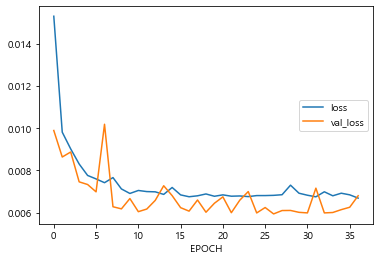

<Figure size 432x288 with 0 Axes>

In [27]:
# 학습결과 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel("EPOCH")
plt.legend(loc='center right')
plt.show()
plt.savefig("train_history.png")

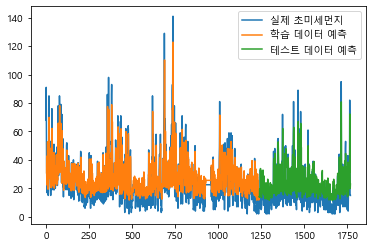

20.237158


In [28]:
# 초미세먼지 예측                           

def plot(data, y_predict_train, y_predict_test):
    plt.plot(transformer.inverse_transform(data)[:, [-1]].flatten(), label='실제 초미세먼지')

    y_predict_train = transformer.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[sequence_length:len(y_predict_train) + sequence_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='학습 데이터 예측')

    y_predict_test = transformer.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + sequence_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='테스트 데이터 예측')
    
    plt.legend()
    plt.show()
    
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

x_test = np.array([
        [15, 15, 15]   #1 월 11, 12, 13일 초미세먼지 농도
])
x_test = x_test.reshape(-1, 1)
x_test = transformer.transform(x_test)
x_test = x_test.reshape(1, sequence_length)

y_predict = model.predict(x_test)

y_predict = transformer.inverse_transform(y_predict)
print(y_predict[0][0])   # 1월 14일 초미세먼지 농도 예측값